In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
#normalization of input set 
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
#architecture of model 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




In [8]:
#train the model 
model.fit(train_images, train_labels, epochs=5)



Epoch 1/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.4995 - acc: 0.8240
Epoch 2/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.3767 - acc: 0.8639
Epoch 3/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.3361 - acc: 0.8790
Epoch 4/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.3131 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.2957 - acc: 0.8910


In [9]:
#get the accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 47us/step
Test accuracy: 0.8829


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
predictions = model.predict(test_images)

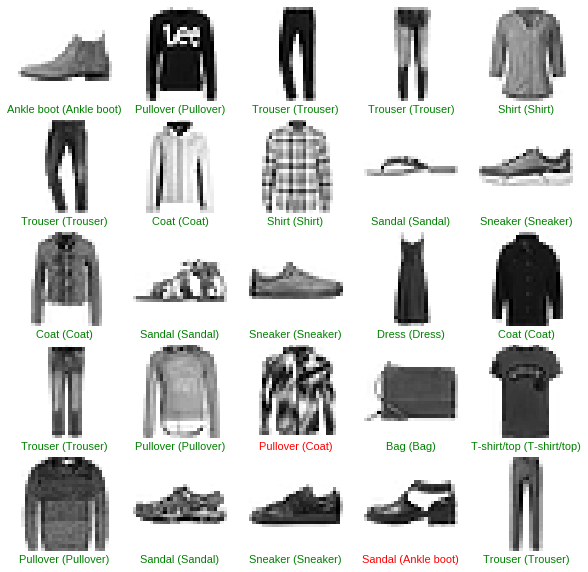

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

In [0]:
#map the google drive to vartual machine
!apt-get install -y -qq software-properties-common python-software-properties module-init-toolsjsonmodel_model
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

/bin/sh: 1: google-drive-ocamlfuse: not found


In [0]:
import os
os.chdir("drive/AxsuML")

In [79]:
#save the model with weight and architecture both.
model.save('weightmodel1.h5')

In [0]:
#saving the model Architutre only.
from keras.models import model_from_json
jsonstring=model.to_json()
jsonmodel_model = model_from_json(jsonstring)
jsonmodel_model.save('jsonmodel.h5')